# PS1-5: Locally Weighted Linear Regression

## (A)
#### Consider the problem of minimizing the weighted cost function

$$J(\theta) = \frac{1}{2}\sum_{i=1}^m w^{(i)} \left(y^{(i)} - x^{(i)} \cdot \theta \right)^{2}$$

### (i)
#### $J(\theta)$ is a quadratic form.

Let $W = \text{diag}(w_1,\dots,w_m)$. Then 

$$J(\theta) = \frac{1}{2} \langle W (X\theta - y) , (X\theta - y) \rangle$$

### (ii)
#### Find the unique critical point of $J$.

$J$ is the composition of two maps, $\theta \mapsto X\theta - y$ and $v \mapsto \frac{1}{2}\langle W v , v \rangle$, so 

$$dJ(\theta) = (X\theta - y)^T W^T X $$

and $J$ is critical when 

$$\theta = (X^TWX)^{-1}X^TWy$$

### (iii)
#### Suppose that $(x^{(i)},y^{(i)})_{i=1}^m$ are independent samples and that for each $i$, the conditional distributions

$$p(y^{(i)}| x^{(i)} ; \theta) \sim N(x^{(i)} \cdot \theta , \sigma^{(i)})$$

#### are normal but with possibly different variances $\sigma^{(i)}$. Show that the MLE estimate reduces to a weighted regression problem.

The negative conditional log likelihood of $\theta$ is 

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \log p(y^{(i)}|x^{(i)} ;\theta)$$

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^m \frac{\left(y^{(i)} - x^{(i)} \cdot \theta\right)^2}{2 (\sigma^{(i)})^2 } + \text{Const.} $$



## (B)
#### Use the Gaussian weights

#### $$w^{(i)} = \exp \left( - \frac{||x^{(i)}-x||_2^2}{2\tau^2} \right)$$

#### to train a locally weighted regression model with $\tau = 1/2$. Report mean-squared error on the validation set. Plot the model's predictions on the training and validation set.

In [5]:
from src import util
from src.p05b_lwr import LocallyWeightedLinearRegression
import numpy as np


## Load the train, test, and validation sets for dataset 5.

x_train , y_train = util.load_dataset('./data/ds5_train.csv',add_intercept=True)
x_test , y_test = util.load_dataset('./data/ds5_test.csv', add_intercept=True)
x_valid , y_valid = util.load_dataset('./data/ds5_valid.csv',add_intercept=True)

## Initialize a model with tau = 1/2 and train it on the training set

model = LocallyWeightedLinearRegression(tau=0.5)
model.fit(x_train,y_train)

tr_preds = model.predict(x_train)
te_preds = model.predict(x_test)
va_preds = model.predict(x_valid)

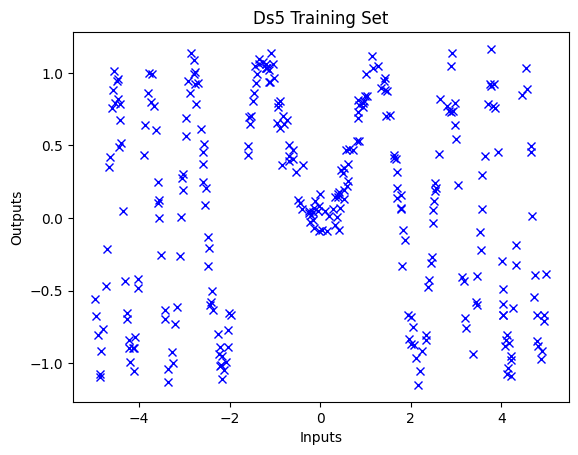

The training set has 300 inputs


In [6]:
import matplotlib.pyplot as plt

## Before we analyze the model, let's visualize the datasets.
## Plot the training set

fig_train , ax_train = plt.subplots()

ax_train.set_title('Ds5 Training Set')
ax_train.set_xlabel('Inputs')
ax_train.set_ylabel('Outputs')

ax_train.plot(x_train[:,-1],y_train, 'bx',linewidth=2)
plt.show()

print('The training set has {} inputs'.format(len(x_train)))

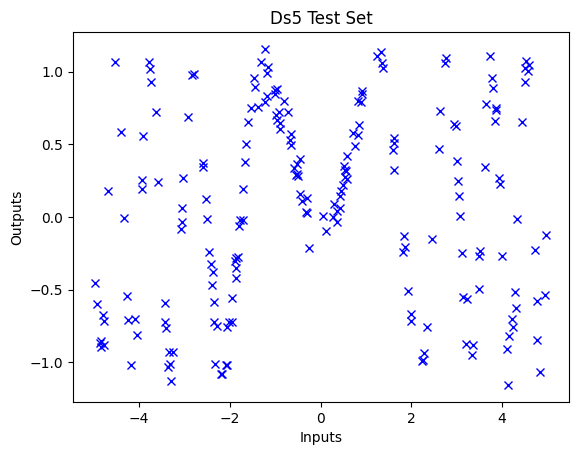

The test set has 200 inputs


In [7]:
## Repeat for the test and validation sets

fig_train , ax_test = plt.subplots()

ax_test.set_title('Ds5 Test Set')
ax_test.set_xlabel('Inputs')
ax_test.set_ylabel('Outputs')

ax_test.plot(x_test[:,-1],y_test, 'bx',linewidth=2)
plt.show()

print('The test set has {} inputs'.format(len(x_test)))

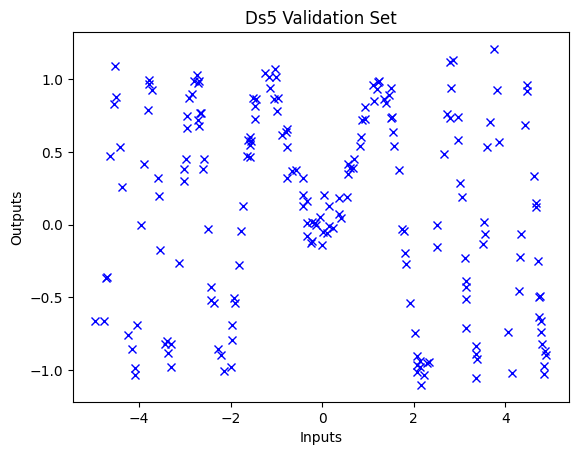

The validation set has 200 inputs


In [8]:
fig_va , ax_va = plt.subplots()

ax_va.set_title('Ds5 Validation Set')
ax_va.set_xlabel('Inputs')
ax_va.set_ylabel('Outputs')

ax_va.plot(x_valid[:,-1],y_valid, 'bx',linewidth=2)
plt.show()

print('The validation set has {} inputs'.format(len(x_valid)))

In [9]:
## Use the model to predict the validation set outputs. Report the Mean-squared error.

# We have already stored the predictions under va_preds. To calculate the mean squared error:

def MSE(Z,y,model):
    '''Returns the mean squared error of the model with inputs Z and true labels y.'''
    preds = model.predict(Z)
    error = np.power(preds-y,2).mean()
    return error , model.tau

    
mse , tau = MSE(x_valid,y_valid,model=model)
print('The mean squared error on the validation set is {} when tau is {}'.format(mse,tau))

The mean squared error on the validation set is 0.3305312682137523 when tau is 0.5


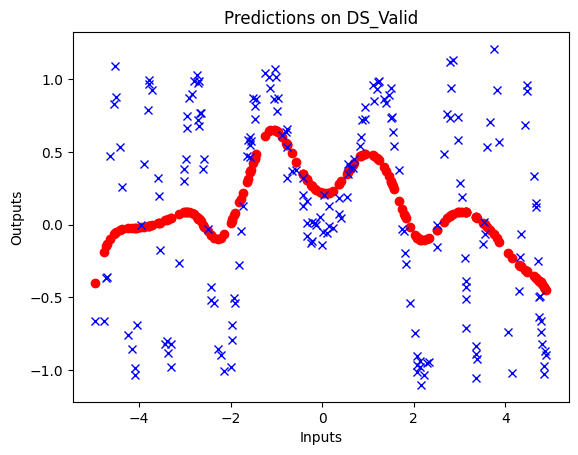

In [10]:
## Plot the predictions over the validation set to get a sense of how the model is going wrong.

fig , ax = plt.subplots()

ax.set_xlabel('Inputs')
ax.set_ylabel('Outputs')
ax.set_title('Predictions on DS_Valid')
ax.plot(x_valid[:,-1],va_preds , 'ro', linewidth=2)
ax.plot(x_valid[:,-1],y_valid, 'bx', linewidth=2)

plt.show()

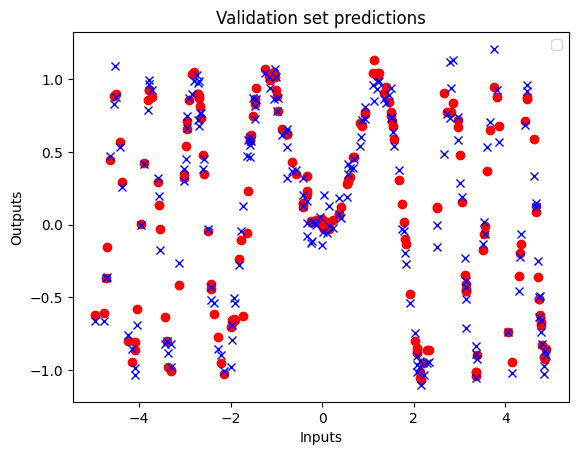

When tau = 0.03, the mean squared error on the validation set is 0.018096163123406502.


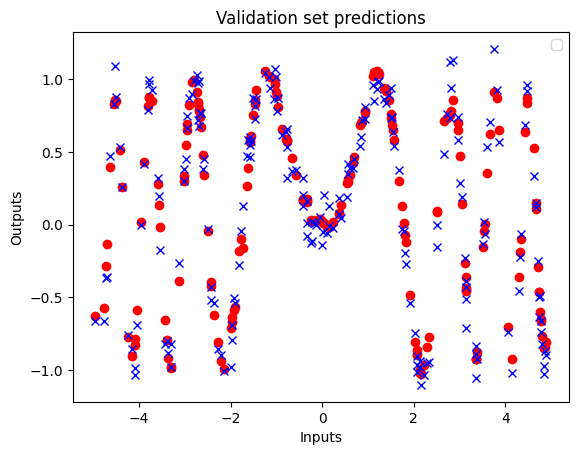

When tau = 0.05, the mean squared error on the validation set is 0.012400076150478495.


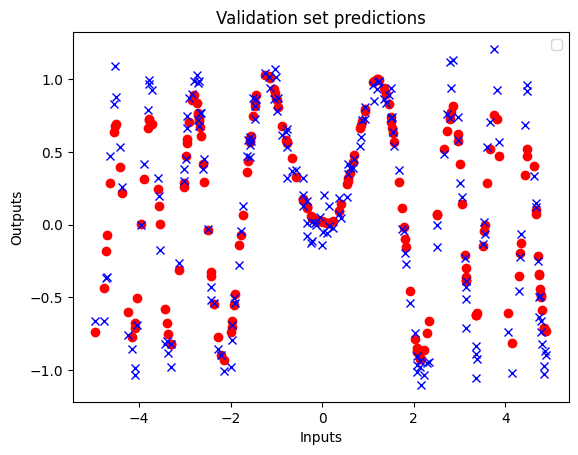

When tau = 0.1, the mean squared error on the validation set is 0.024224589379806014.


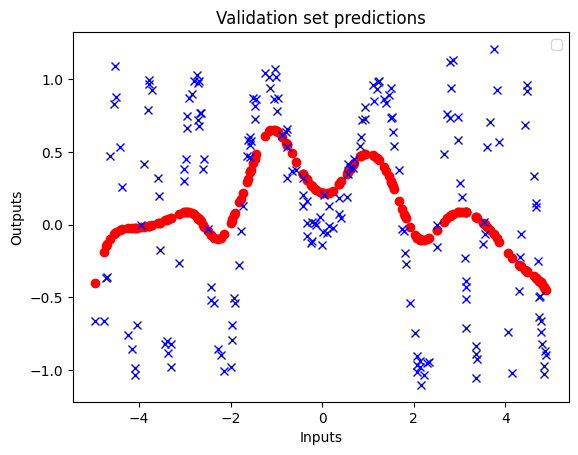

When tau = 0.5, the mean squared error on the validation set is 0.3305312682137523.


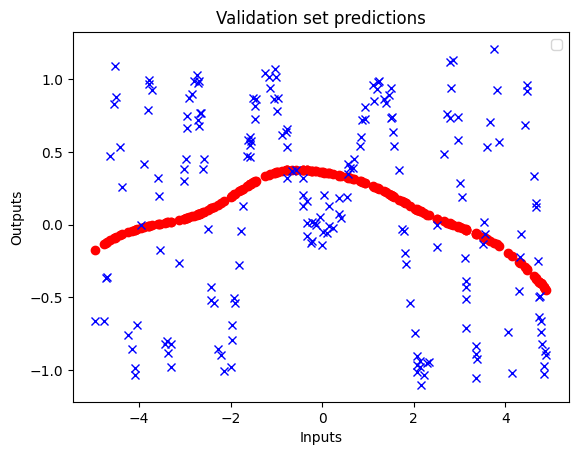

When tau = 1.0, the mean squared error on the validation set is 0.4000959480180859.


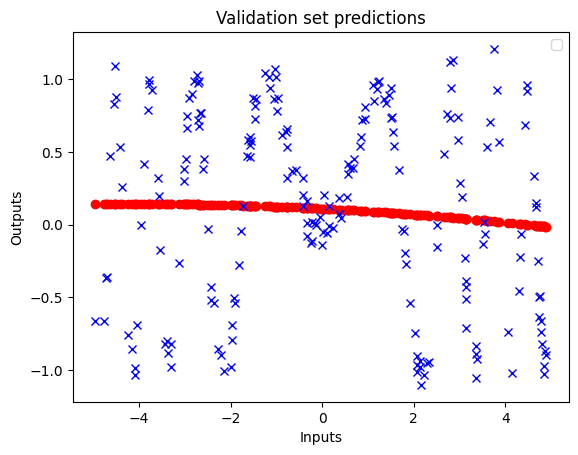

When tau = 10.0, the mean squared error on the validation set is 0.4337439227232362.


In [11]:
## It is clear the model is underfitting. Now we'll tune the parameter tau to get a better fit.
## Consider the following list of tau values

tau_values=[3e-2, 5e-2, 1e-1, 5e-1, 1e0, 1e1]

model = LocallyWeightedLinearRegression(1)
model.fit(x_train,y_train)
errors = []

for tau in tau_values:
    model.tau = tau
    mse , _ = MSE(x_valid,y_valid,model)
    errors.append(mse)

    fig , ax = plt.subplots()
    ax.set_title('Validation set predictions')
    ax.legend('tau = {}'.format(tau))
    ax.set_xlabel('Inputs')
    ax.set_ylabel('Outputs')
    ax.plot(x_valid[:,-1], model.predict(x_valid), 'ro', linewidth=1)
    ax.plot(x_valid[:,-1], y_valid, 'bx', linewidth=2)
    
    plt.show()

    print('When tau = {}, the mean squared error on the validation set is {}.'.format(tau,mse))

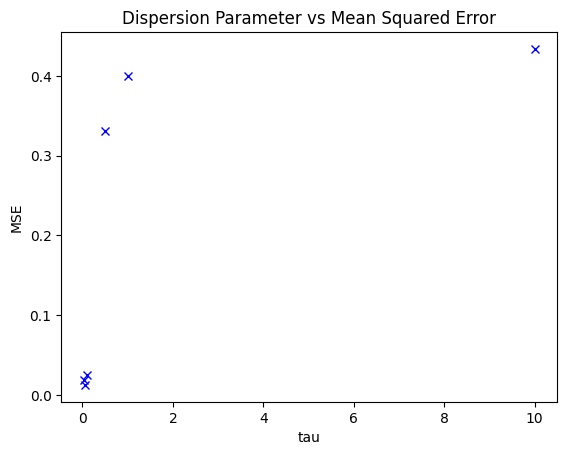

In [13]:
## Now we'll plot tau vs the mean squared error to see what's going on better.

fig , ax = plt.subplots()
ax.set_title('Dispersion Parameter vs Mean Squared Error')
ax.set_xlabel('tau')
ax.set_ylabel('MSE')
ax.plot(tau_values, errors, 'bx', linewidth=2)
plt.show()

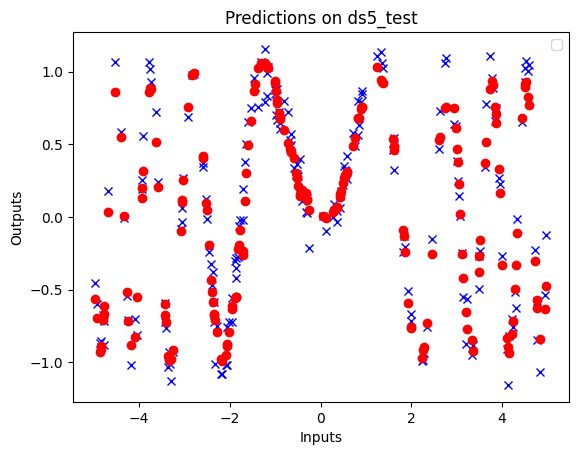

The mean squared error on the test set is 0.01699014338686052


In [14]:
## Finally, we predict the test split with the tau with least MSE.

# Find the minimum MSE.

min_index = errors.index(np.array(errors).min())
tau_min = tau_values[min_index]

## Create and train the model
model = LocallyWeightedLinearRegression(tau_min)
model.fit(x_train,y_train)

## Make the prediction and plot against the true labels
preds = model.predict(x_test)

fig , ax = plt.subplots()
ax.set_title('Predictions on ds5_test')
ax.set_xlabel('Inputs')
ax.set_ylabel('Outputs')
ax.legend('tau = {}'.format(tau_min))
ax.plot(x_test[:,-1],y_test, 'bx', linewidth=2)
ax.plot(x_test[:,-1],preds, 'ro', linewidth=1)

plt.show()
mse , _ = MSE(x_test,y_test,model)
print('The mean squared error on the test set is {}'.format(mse))